In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [15]:
plant_growth = pd.read_csv('C:/Users/avay.risal/OneDrive - Texas A&M AgriLife/Documents/ANOVA/PlantGrowth.csv')
plant_growth.shape

(30, 3)

In [37]:
plant_growth.head()

,SN,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [72]:
plant_growth[['weight']].mean(axis=0)

weight    5.073
dtype: float64

In [73]:
plant_growth[['weight']].dropna().describe()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


In [74]:
plant_growth.groupby('group').mean()

,SN,weight
group,,
ctrl,5.5,5.032
trt1,15.5,4.661
trt2,25.5,5.526


In [81]:
plant_growth.groupby('group').describe()

SN                                                weight         \
      count  mean      std   min    25%   50%    75%   max  count   mean   
group                                                                      
ctrl   10.0   5.5  3.02765   1.0   3.25   5.5   7.75  10.0   10.0  5.032   
trt1   10.0  15.5  3.02765  11.0  13.25  15.5  17.75  20.0   10.0  4.661   
trt2   10.0  25.5  3.02765  21.0  23.25  25.5  27.75  30.0   10.0  5.526   

                                                    
            std   min     25%    50%     75%   max  
group                                               
ctrl   0.583091  4.17  4.5500  5.155  5.2925  6.11  
trt1   0.793676  3.59  4.2075  4.550  4.8700  6.03  
trt2   0.442573  4.92  5.2675  5.435  5.7350  6.31

In [101]:
summary = plant_growth[['weight','group']].groupby('group').describe()
summary.head()

weight                                                    
       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31

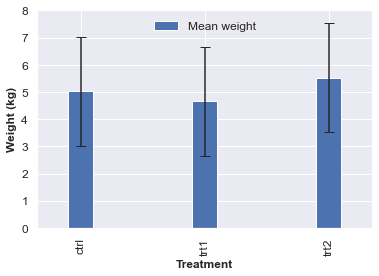

In [171]:
ax= summary.plot.bar(y= 1, yerr=2,capsize=5, width=0.2, label='Mean weight')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)

plt.ylim (0,8)
    
plt.xlabel('Treatment',size = 12,fontweight ='bold')
plt.ylabel('Weight (kg)',size = 12,fontweight ='bold')

plt.legend(fontsize=12 , loc=9, frameon=False)

In [93]:
treatment= ["control", "treatment 1","treatment 2"]
Average_weight = [summary.mean]

print(Average_weight)

# plt.bar(treatment, Average_weight)

[<bound method NDFrame._add_numeric_operations.<locals>.mean of       weight                                                    
       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31>]


Text(0, 0.5, 'Weight (kg)')

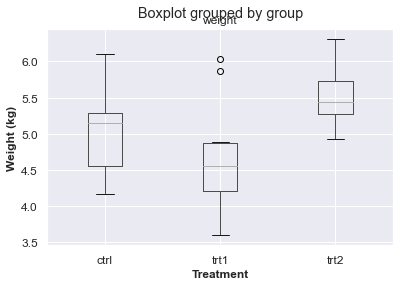

In [168]:
#boxplot
ax2= plant_growth.boxplot('weight', by = 'group')

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(12)
    
plt.xlabel('Treatment',size = 12,fontweight ='bold')
plt.ylabel('Weight (kg)',size = 12,fontweight ='bold')


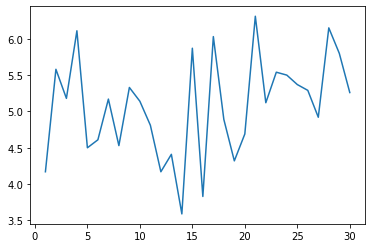

In [131]:
type(data)
data.weight
type(data.weight)
data.weight.iloc[1]
plt.plot(data.SN, data.weight)

In [132]:
ctrl = data[data.group == "ctrl"]
trt1 = data[data.group == "trt1"]
trt2 = data[data.group == "trt2"]

<function matplotlib.pyplot.show(close=None, block=None)>

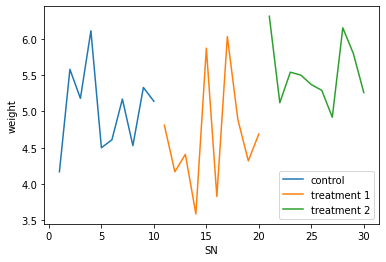

In [133]:
plt.plot(ctrl.SN, ctrl.weight)
plt.plot(trt1.SN, trt1.weight)
plt.plot(trt2.SN, trt2.weight)
plt.legend(["control","treatment 1","treatment 2"])
plt.ylabel ("weight")
plt.xlabel ("SN")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

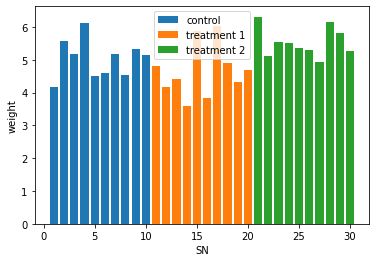

In [134]:
plt.bar(ctrl.SN, ctrl.weight)
plt.bar(trt1.SN, trt1.weight)
plt.bar(trt2.SN, trt2.weight)
plt.legend(["control","treatment 1","treatment 2"])
plt.ylabel ("weight")
plt.xlabel ("SN")
plt.show

In [135]:
import numpy as np
import statistics as st
mean_ctrl = st.mean(ctrl.weight)
mean_trt1 = st.mean(trt1.weight)
mean_trt2 = st.mean(trt2.weight)

print(mean_ctrl)
print(mean_trt1)
print(mean_trt2)

median_ctrl = st.median(ctrl.weight)
median_trt1 = st.median(trt1.weight)
median_trt2 = st.median(trt2.weight)
print(median_ctrl)
print(median_trt1)
print(median_trt2)

stdev_ctrl = st.stdev(ctrl.weight)
stdev_trt1 = st.stdev(trt1.weight)
stdev_trt2 = st.stdev(trt2.weight)
print(stdev_ctrl)
print(stdev_trt1)
print(stdev_trt2)


5.032
4.661
5.526
5.154999999999999
4.550000000000001
5.4350000000000005
0.5830913783924057
0.7936756964347033
0.44257328332278606


<function matplotlib.pyplot.show(close=None, block=None)>

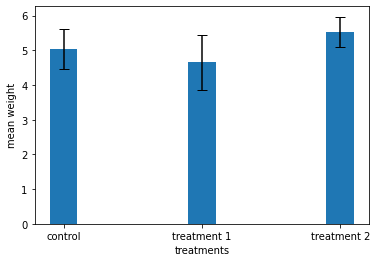

In [136]:
treatment= ["control", "treatment 1","treatment 2"]
means=[mean_ctrl,mean_trt1,mean_trt2]
stdevs=[stdev_ctrl,stdev_trt1,stdev_trt2]
plt.bar(treatment, means, width=0.2, yerr=stdevs, capsize=5)
# plt.legend(["control","treatment 1","treatment 2"])
plt.ylabel ("mean weight")
plt.xlabel ("treatments")
plt.show

In [137]:
mod =ols('weight ~ group', data=data).fit()
aov_table = sm.stats.anova_lm(mod,typ=2)
print(aov_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


In [4]:
# # grps = pd.unique(data.group.values)
# d_data = {grp:data['weight'][data.group == grp] for grp in grps}
# k=len(pd.unique(data.group))
# N=len(data.values)
# n=data.groupby('group').size()[0]

# # One-way Anova using SciPy
# from scipy import stats

# f,p = stats.f_oneway(d_data['ctrl'],d_data['trt1'],d_data['trt2'])